**Importing** **Libraries**

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision import models
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.optim import lr_scheduler
from tqdm import tqdm
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report

**Data Transformation**

In [2]:

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # Convert MNIST to RGB format as Resnet is based on RGB
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


**Activating GPU**

In [3]:
device = torch.device("cuda")

**Downloading MNIST Data**

In [4]:
# training dataset called "train_data" using the MNIST dataset from the 'mnist_data' directory
train_data = torchvision.datasets.MNIST('mnist_data',train=True , download=True , transform =transform)
# validation dataset called "val_data" using the MNIST dataset from the 'mnist_data' directory.
val_data = torchvision.datasets.MNIST('mnist_data',train=False , download=True , transform =transform)

train_dl = torch.utils.data.DataLoader(train_data, batch_size=64)
val_dl = torch.utils.data.DataLoader(val_data, batch_size=64)

100%|██████████| 9912422/9912422 [00:00<00:00, 174212803.09it/s]

Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 39586828.05it/s]


Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 43200291.07it/s]

Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 845900.66it/s]


Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



In [ ]:
len(val_dl)

157

**Loading Pre-Trained Model**

In [5]:
# Load pre-trained ResNet18 model
model = models.resnet18(pretrained=False)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


**Adjusting  output layers of model according to our DataSet**

In [21]:
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 10)  # Adjust the output layer for 10 classes (MNIST)
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


**Setting the model to training**

In [7]:
model.train()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

**Defining Loss Functions and Optimzer for model according to our data**


**Added weight decay and dropout to adjust overfitting in the model**

In [22]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=1e-4)
model.dropout = nn.Dropout(0.5)


**Using learning rate schedular to optimize training further more**

In [9]:
# Define a learning rate scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # Adjust step_size and gamma as needed

**Running Model on GPU**

In [10]:
model = model.to(device)

In [11]:
mnist_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 165170436.46it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 30535844.17it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41910683.25it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20506489.52it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [12]:
data_loader = torch.utils.data.DataLoader(mnist_dataset, batch_size=64, shuffle=False)

**We append the true and predicted labels to these lists inside the training loop**

In [13]:
true_labels = []
predicted_labels = []


**Model training on 25 Epochs**

In [23]:
model = model.to(device)
num_epochs = 25
best_accuracy = 0.0

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    true_labels = []  # Initialize true_labels for this epoch
    predicted_labels = []  # Initialize predicted_labels for this epoch

    # Use tqdm to display a progress bar
    for images, labels in tqdm(data_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
        optimizer.zero_grad()

        # Move data to GPU
        images = images.to(device)
        labels = labels.to(device)

        # Now, you can safely pass the input through the model
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Convert tensors to numpy arrays and append to the lists
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total
    print(f'Loss: {running_loss/len(data_loader):.4f}, Accuracy: {accuracy:.2f}%')

# After all epochs are completed
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels)

print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Epoch 1/25: 100%|██████████| 157/157 [00:45<00:00,  3.45it/s]


Loss: 2.2316, Accuracy: 24.02%


Epoch 2/25: 100%|██████████| 157/157 [00:45<00:00,  3.45it/s]


Loss: 2.0783, Accuracy: 37.03%


Epoch 3/25: 100%|██████████| 157/157 [00:45<00:00,  3.48it/s]


Loss: 1.9305, Accuracy: 49.66%


Epoch 4/25: 100%|██████████| 157/157 [00:45<00:00,  3.46it/s]


Loss: 1.7977, Accuracy: 59.88%


Epoch 5/25: 100%|██████████| 157/157 [00:45<00:00,  3.47it/s]


Loss: 1.6748, Accuracy: 68.08%


Epoch 6/25: 100%|██████████| 157/157 [00:44<00:00,  3.49it/s]


Loss: 1.5553, Accuracy: 73.75%


Epoch 7/25: 100%|██████████| 157/157 [00:45<00:00,  3.46it/s]


Loss: 1.4312, Accuracy: 77.73%


Epoch 8/25: 100%|██████████| 157/157 [00:45<00:00,  3.47it/s]


Loss: 1.2986, Accuracy: 81.07%


Epoch 9/25: 100%|██████████| 157/157 [00:45<00:00,  3.48it/s]


Loss: 1.1621, Accuracy: 83.30%


Epoch 10/25: 100%|██████████| 157/157 [00:45<00:00,  3.47it/s]


Loss: 1.0314, Accuracy: 85.21%


Epoch 11/25: 100%|██████████| 157/157 [00:45<00:00,  3.46it/s]


Loss: 0.9145, Accuracy: 86.81%


Epoch 12/25: 100%|██████████| 157/157 [00:44<00:00,  3.50it/s]


Loss: 0.8122, Accuracy: 88.39%


Epoch 13/25: 100%|██████████| 157/157 [00:45<00:00,  3.44it/s]


Loss: 0.7227, Accuracy: 89.51%


Epoch 14/25: 100%|██████████| 157/157 [00:45<00:00,  3.48it/s]


Loss: 0.6450, Accuracy: 90.45%


Epoch 15/25: 100%|██████████| 157/157 [00:44<00:00,  3.50it/s]


Loss: 0.5777, Accuracy: 91.35%


Epoch 16/25: 100%|██████████| 157/157 [00:45<00:00,  3.48it/s]


Loss: 0.5200, Accuracy: 92.11%


Epoch 17/25: 100%|██████████| 157/157 [00:45<00:00,  3.48it/s]


Loss: 0.4701, Accuracy: 92.79%


Epoch 18/25: 100%|██████████| 157/157 [00:45<00:00,  3.49it/s]


Loss: 0.4272, Accuracy: 93.47%


Epoch 19/25: 100%|██████████| 157/157 [00:45<00:00,  3.48it/s]


Loss: 0.3903, Accuracy: 93.96%


Epoch 20/25: 100%|██████████| 157/157 [00:45<00:00,  3.48it/s]


Loss: 0.3583, Accuracy: 94.39%


Epoch 21/25: 100%|██████████| 157/157 [00:44<00:00,  3.50it/s]


Loss: 0.3304, Accuracy: 94.78%


Epoch 22/25: 100%|██████████| 157/157 [00:45<00:00,  3.48it/s]


Loss: 0.3060, Accuracy: 95.07%


Epoch 23/25: 100%|██████████| 157/157 [00:45<00:00,  3.46it/s]


Loss: 0.2846, Accuracy: 95.32%


Epoch 24/25: 100%|██████████| 157/157 [00:44<00:00,  3.51it/s]


Loss: 0.2658, Accuracy: 95.55%


Epoch 25/25: 100%|██████████| 157/157 [00:44<00:00,  3.49it/s]

Loss: 0.2491, Accuracy: 95.67%
Confusion Matrix:
[[ 936    0   10    0    6    4   15    2    6    1]
 [   0 1122    8    0    2    0    2    1    0    0]
 [   5    0  979   10    1   11   10    8    7    1]
 [   0    0   12  967    0    6    0   16    6    3]
 [   1    1    0    0  944    0   11    1    2   22]
 [   2    1   10   11    0  847    1   11    2    7]
 [  11    6    4    0    7    2  917    0   10    1]
 [   1    4    9    7    4    2    0  992    0    9]
 [   1    0    2    5    1    6    7    0  928   24]
 [  21    3    2    4   13   11    0   12    8  935]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.95      0.95      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.96       982
           5       0.95      0.95      0.95       892
           6      

**Heat Map of Confusion Matrix**

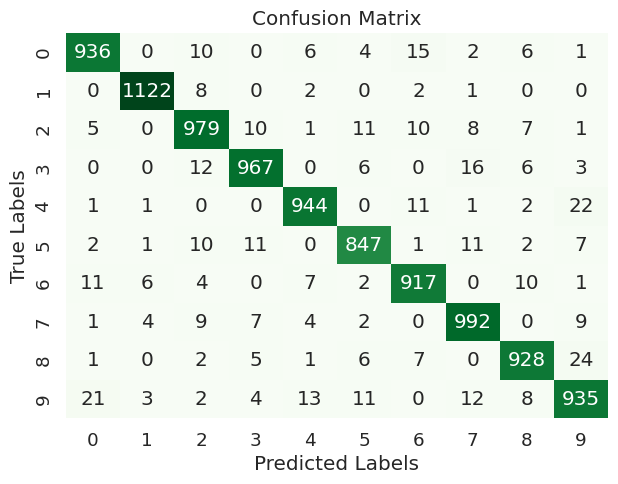

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()